In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from itertools import combinations
from sympy import Point, Triangle
plt.style.use("bmh")

In [455]:
data_points = pd.read_excel("Roundness_Data.xlsx")
N = len(data_points)
data_points

,X,Y
0,1.0249,0.0863
1,0.9991,0.2226
2,0.5974,0.7736
3,0.4731,0.8485
4,0.8803,0.4794
5,0.8017,0.5899
6,0.9527,0.3551
7,0.7047,0.6884
8,0.2101,0.9295
9,0.0708,0.9483


#### Calculate center and radius

In [456]:
a = (data_points["X"].mean()) * 2
b = (data_points["Y"].mean()) *2
c = data_points["X"] + a
d = data_points["Y"] + b
c_square = np.power(c, 2)
d_square = np.power(d, 2)
r = np.sqrt(c_square + d_square).sum() / N
print(a)
print(b)
print(r)
theta = np.linspace(0, 2 * np.pi, 500)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)


0.07267692307692308
-0.10612820512820516
1.0099012177376572


In [457]:
points = []
circle_centers = []

def calculate_circle_properties(point1, point2, point3):
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3

    # Calculate midpoints of the chords
    mid1 = ((x1 + x2) / 2, (y1 + y2) / 2)
    mid2 = ((x2 + x3) / 2, (y2 + y3) / 2)

    # Slopes of the perpendicular bisectors
    if y2 - y1 == 0:
        slope1 = np.inf
    else:
        slope1 = -(x2 - x1) / (y2 - y1)
    if y3 - y2 == 0:
        slope2 = np.inf
    else:
        slope2 = -(x3 - x2) / (y3 - y2)

    # Calculate the center of the circle
    cx = (slope1 * mid1[0] - slope2 * mid2[0] + mid2[1] - mid1[1]) / (slope1 - slope2)
    cy = slope1 * (cx - mid1[0]) + mid1[1]

    # Calculate the radius
    radius = np.sqrt((cx - x1)**2 + (cy - y1)**2)

    return (cx, cy, radius)

for i in range(0, N, 1):
    temp = tuple(data_points.loc[i])
    points.append(temp)
circle_points = list(combinations(points, 3))

for center in circle_points: 
    point1 = center[0]
    point2 = center[1]
    point3 = center[2]
    circle_center = calculate_circle_properties(point1, point2, point3)
    circle_centers.append(circle_center)
print(len(circle_centers))
print(len(points))


9139
39


In [458]:
max_IC = []
for center in circle_centers: 
    lengths = []
    count = 0
    for point in points: 
        length = np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)
        lengths.append(length)
    for distance in lengths: 
        if distance >= center[2]:
            count += 1
    if count == N: 
        max_IC.append(center)
    # print(count)

mic_radius = []
for i in max_IC: 
    mic_radius.append(i[2])
max(mic_radius)
mic_id = mic_radius.index(max(mic_radius))
print(max_IC[mic_id])
MIC_circle = max_IC[mic_id]

(0.03548337164156865, -0.05333328708205748, 0.9960304674006688)


In [459]:
min_mc = []
for center in circle_centers: 
    lengths = []
    count = 0
    for point in points: 
        length = np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)
        lengths.append(length)
    for distance in lengths: 
        if distance <= center[2]:
            count += 1
    if count == N: 
        min_mc.append(center)
    # print(count)

mic_radius = []
for i in min_mc: 
    mic_radius.append(i[2])
min(mic_radius)
mcc_id = mic_radius.index(min(mic_radius))
# print(min_mc[mcc_id])b
MCC_circle = min_mc[mcc_id]
print(MCC_circle)

(0.0349321429814221, -0.05302545539111825, 1.0044223348346455)


In [460]:
x1 = 0.03548337164156865 + 0.9960304674006688 * np.cos(theta)
y1 = -0.05333328708205748 + 0.9960304674006688 * np.sin(theta)

In [461]:
x2 = 0.0349321429814221 + 1.0044223348346455 * np.cos(theta)
y2 = -0.05302545539111825 + 1.0044223348346455 * np.sin(theta)

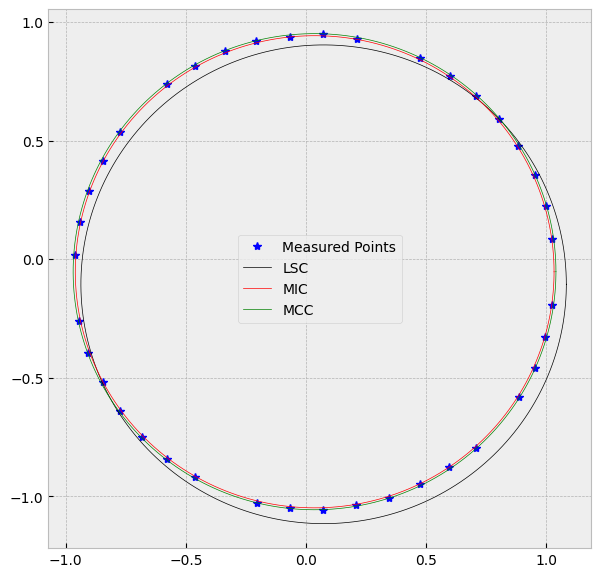

In [462]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()
plt.plot(data_points["X"], data_points["Y"], marker="*", markersize=6, lw=0, color="b", label="Measured Points")
plt.plot(x, y, color="black", lw=0.5, label="LSC")
plt.plot(x1, y1, color="red", lw=0.5, label="MIC")
plt.plot(x2, y2, color="green", lw=0.5, label="MCC")
plt.legend()
plt.show()